# Project: Investigate a Dataset - [Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data we used in this project is **the Gapminder World** dataset. We chose three metrics as follows: 
> * Metric 1: Life expectancy in years. 
> * Metric 2: The consumption of sugar in grams per person daily.
> * Metric 3: Happiness score: this is a response to the question of a ladder with steps numbered from 0 to 10 where people were asked to answer on which step they are standing. 

> The data includes three tables, each table representing a specific metric, its evolution over years for a given number of countries. 
>**Column names:** 
> * *country* : represents the column of the different countries (The number of countries lies between 163 and 206). 
> * *year* : In addition to the country column, each table contains as many columns as the number of given years (e.g. for the life expectancy table, the years are between 1800 and 2100 while for the happiness score table, they are between 2005 and 2019)   


### Questions for Analysis
>**Question 1**: Have certain regions of the world been growing in life expectancy metric better than others ? 

>**Question 2**: Is there any relationship between life expectancy metric and happiness score/ sugar consumption metrics ?  


<a id='libraries'></a>
## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading data from Gapminder World 
> In this section, we are loading three tables that we chose from the Gapminder world dataset, representing respectively the life expectancy metric, the daily sugar consumption per person and the happiness score.  

In [2]:
df_life_exp = pd.read_csv('life_expectancy_years.csv')
df_brst_cancer = pd.read_csv('breast_cancer_number_of_new_female_cases.csv') 
df_sugar = pd.read_csv('sugar_per_person_g_per_day.csv')  
df_hapy_scor = pd.read_csv('hapiscore_whr.csv')

> In the following cell, we are printing few lines of each table and inspect if there is any missing or possibly errant data. 

In [3]:
display(df_life_exp.head())
display(df_sugar.head())
display(df_hapy_scor.head())

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,14.4,12.8,13.2,15.5,16.3,16.7,17.4,17.8,14.5,...,23.3,24.2,24.8,25.4,24.5,34.7,32.6,29.9,32.6,34.9
1,Angola,25.2,30.6,33.6,29.5,29.5,28.8,29.4,34.5,29.9,...,40.2,38.9,40.1,42.7,44.7,60.2,59.9,58.4,62.2,55.8
2,Albania,31.0,31.8,34.3,36.5,37.0,37.7,38.3,38.6,40.9,...,117.0,113.0,122.0,129.0,131.0,83.2,94.2,98.8,98.7,101.0
3,Netherlands Antilles,91.9,93.4,89.5,96.3,96.0,90.0,90.2,95.6,93.2,...,165.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,97.2,98.4,97.6,93.3,93.8,83.3,96.0,108.0,113.0,...,94.1,107.0,95.3,98.8,101.0,123.0,124.0,117.0,105.0,114.0


,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


In [4]:
#Check if there is any duplicates in the three tables 
display(df_life_exp.duplicated().sum())
display(df_sugar.duplicated().sum())
display(df_hapy_scor.duplicated().sum())

0

0

0

In [5]:
#Checking the missing data 
df_life_exp.isna().sum()
df_sugar.isna().sum()
df_hapy_scor.isna().sum()

country      0
2005       136
2006        74
2007        62
2008        54
2009        50
2010        40
2011        18
2012        23
2013        28
2014        20
2015        22
2016        23
2017        17
2018        29
2019        12
dtype: int64

>  For instance, the tables differ in the period of time on which data are collected. While life expectancy has a wide range from 1800 to 2100, the happiness score table lies between 2005 and 2019.    
> There is no duplicated rows in all tables. However, there are missing values in all of them and happiness score table has the most missing values.


### Data Cleaning

> In the following cell, we will drop the rows where at least one element is missing for the tables: life expectancy and sugar consumption as for the happiness score, we can't proceed similarly because the data is very limited. Instead, we are dropping rows with more than 3 Nan values and replacing the others with the row average. 

In [6]:
#dropping rows with missing values for the three tables: life expectancy, breast cancer and sugar consumption
df_life_exp.dropna(inplace=True)
df_brst_cancer.dropna(inplace=True)
df_sugar.dropna(inplace=True)

In [7]:
#Keep the rows with missing values less than 4 for the happy score table 
df_hapy_scor = df_hapy_scor[df_hapy_scor.isnull().sum(axis=1) < 4]

In [8]:
#setting the country column as an index and Fill Nan values with the average row 
df_hapy_scor.set_index('country',inplace=True)
df_hapy_scor = df_hapy_scor.apply(lambda row: row.fillna(row.mean()), axis=1)

In [9]:
#As all the tables have the country column in common, we set it as index for all of them
df_life_exp.set_index('country',inplace=True)
df_brst_cancer.set_index('country',inplace=True)
df_sugar.set_index('country',inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Have certain regions of the world been growing in life expectancy metric better than others ?

In [10]:
df_life_exp.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,83.361828,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,5.803782,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,66.400000,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,79.650000,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.000000,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,87.775000,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [11]:
#displaying the statistical characteristics between 1944 and 2004 
df_life_exp.describe().iloc[:, list(range(144,160))+list(range(200,205))]

,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,1955,1956,1957,1958,1959,2000,2001,2002,2003,2004
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,41.468280,43.284946,46.918280,47.511828,49.756989,50.945699,52.123656,52.297312,52.995699,53.589785,...,54.481183,54.913441,55.244086,55.812366,56.163441,67.352688,67.625269,67.819892,68.072581,68.345699
std,11.014635,10.425332,9.905188,10.491601,10.112972,10.092165,10.323465,10.469644,10.536361,10.504854,...,10.467129,10.473064,10.443619,10.576307,10.433685,9.529182,9.543933,9.525362,9.484294,9.406766
min,15.400000,17.100000,28.900000,13.600000,30.700000,30.700000,30.600000,26.500000,29.500000,32.600000,...,33.400000,33.800000,33.000000,31.000000,35.700000,43.800000,43.900000,44.200000,43.900000,43.100000
25%,34.250000,35.325000,39.525000,39.650000,42.150000,43.025000,43.650000,44.000000,44.350000,44.650000,...,45.575000,45.775000,45.825000,46.075000,46.725000,60.450000,60.950000,61.400000,61.575000,61.850000
50%,40.100000,41.150000,45.600000,46.500000,49.000000,50.800000,51.900000,52.450000,53.000000,53.350000,...,54.650000,55.100000,55.550000,56.150000,56.750000,70.350000,70.600000,70.700000,70.950000,71.050000
75%,48.100000,49.875000,54.225000,55.500000,57.225000,58.150000,59.675000,60.150000,60.750000,61.700000,...,62.900000,63.475000,63.775000,64.750000,64.825000,74.675000,75.000000,75.000000,75.175000,75.350000
max,68.400000,68.800000,69.800000,70.300000,71.400000,71.900000,73.000000,72.200000,72.600000,72.900000,...,73.200000,73.300000,73.300000,73.300000,73.500000,81.600000,81.900000,82.200000,82.300000,82.500000


> We notice that life expectancy has made a huge leap in average from 19th century with 31.5 years to around 83.5 years in the 21st century. In the eighties, 25% of the world population were expected to live 29 years and 75 %  around 34 years. It is only in the middle the 21st century that life expectancy has started to improve and reach around 50 years old for 75% of the world population.  

> In the next cells, we will try to find the country that has the maximum life expectancy values over the years. 

In [12]:
df_life_exp.idxmax().value_counts()

Norway            86
Singapore         80
Japan             42
Sweden            34
Iceland           17
Denmark           13
Australia         12
Netherlands       12
United Kingdom     2
Finland            1
Belgium            1
Israel             1
dtype: int64

Text(0.5, 1.0, 'Regions with most max values in terms of life expectancy between 1800 and 2100')

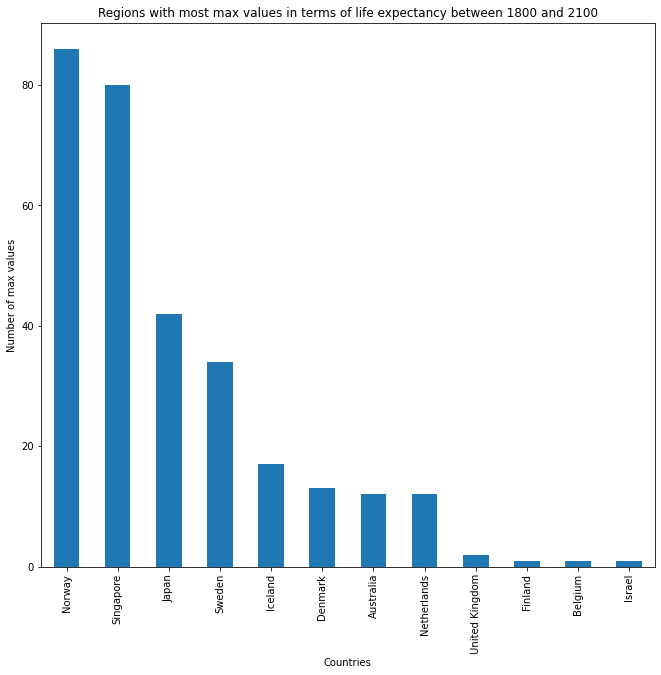

In [13]:
# We look for the country that has the most max values between 1800 and 2021
df_life_exp.idxmax().value_counts().plot(kind='bar',figsize=(11,10),xlabel = 'Countries', ylabel = 'Number of max values')
plt.title('Regions with most max values in terms of life expectancy between 1800 and 2100')

> Norway is the country that has the most maximum values in life expectancy, then, we have Singapore, Japan, Sweden Iceland and Denmark. Let's plot the evolution of this metric over the years for each country.   

Text(0, 0.5, 'Life expectancy metric in years')

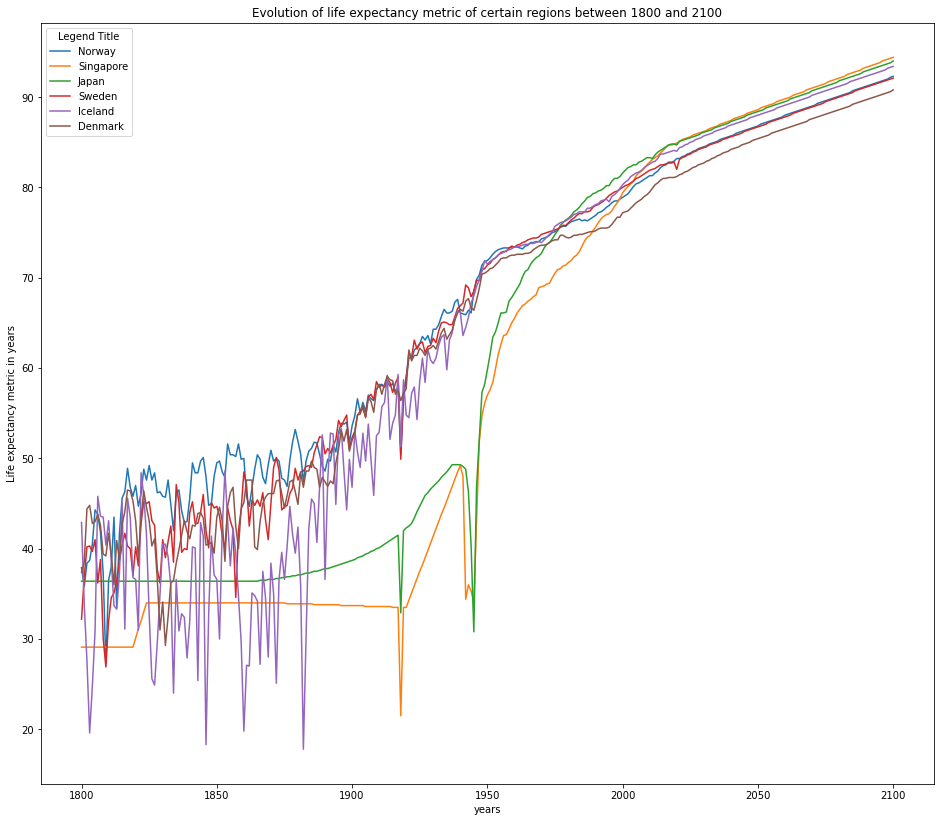

In [14]:
leg=[] 
country_arr = ['Norway','Singapore','Japan','Sweden','Iceland','Denmark']
for c in country_arr:
    df_life_exp.loc[c].plot(kind = 'line',figsize=(16,14))
    leg.append(c)
plt.legend(leg,loc='upper left', title='Legend Title')
plt.title('Evolution of life expectancy metric of certain regions between 1800 and 2100')
plt.xlabel('years')
plt.ylabel('Life expectancy metric in years')

> Norway, Sweden and iceland have almost the same trend, they are fluctuating in the period between 1800 and 1960 and then follow a smooth increase since the sxties until 2100. On the other hand, Singapore and Japan had two drops during the same period but made a remarkable leap in the sixties till 2100. The question here, what factors have contibuted to get such better evolution of life expectancy to these countries ? it is worthnoting that all Scandinavian countries (Norway, Singapore and Denmark) are among the countries that have been growing better than the rest of regions. Is it related to the happy score level ? or does the sugar consumption affect such a metric ? In the second part of our analysis, we will try to answer these questions. 

### Is there any relationship between life expectancy metric and happiness score/ sugar consumption metrics 



#### Relationship between life expectancy and happy score metrics 
> In this part of the analysis, we will study if there is a correlation between life expectancy and happiness score metrics. First, we will compute the average for each country in the two tables and then compute a scatter plot. 

In [15]:
# compute the mean 
life_exp_mean = df_life_exp.mean(axis=1)
hapy_scor_mean = df_hapy_scor.mean(axis=1)

> In the following, we will compute a scatter plot between life expectancy and happiness score in average but first we need to find the common indices between the two table. For that, we create a function common_indexes

In [16]:
def common_indexes(m1,m2):
    id_1 = m1.index
    id_2 = m2.index
    id_com = id_1.intersection(id_2)
    return id_com

In [17]:
# Search for the common indices between life expectancy and happiness score tables 
id_com = common_indexes(life_exp_mean,hapy_scor_mean)

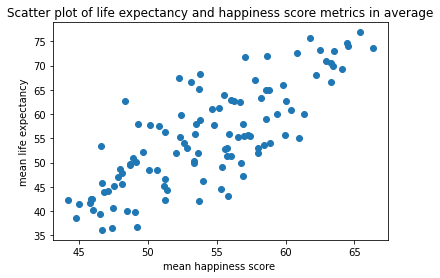

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(life_exp_mean[id_com], hapy_scor_mean[id_com])
plt.xlabel('mean happiness score ')
plt.ylabel('mean life expectancy')
plt.title('Scatter plot of life expectancy and happiness score metrics in average')
plt.show()

> We clearly notice that there is a good positive correlation between life expectancy and happy score mean values. Let's check in the following which countries that have the highest mean.   

In [19]:
hapy_scor_mean.sort_values(ascending=False)[:10]

country
Denmark        76.885714
Finland        75.741667
Netherlands    74.638462
Canada         74.100000
Sweden         73.707143
New Zealand    73.223077
Australia      72.930769
Austria        72.525000
Israel         72.050000
Costa Rica     71.878571
dtype: float64

> There is a high overlap between the countries that scored the best in happy score metric and the ones found in the previous question as  growing the most in terms of life expectancy. As usual, the Scandinavian countries are among the first top 5. 

#### Relationship between life expectancy and sugar consumption metrics 
> In this part of the analysis, we will study if there is a correlation between life expectancy and sugar consumption metric. First, we will compute the average for each country in the two tables and then compute a scatter plot. 

In [20]:
# compute the mean 
sug_mean = df_sugar.mean(axis=1)

In [21]:
# Search for the common indices between life expectancy and sugar consumption tables 
id_com = common_indexes(life_exp_mean,sug_mean)

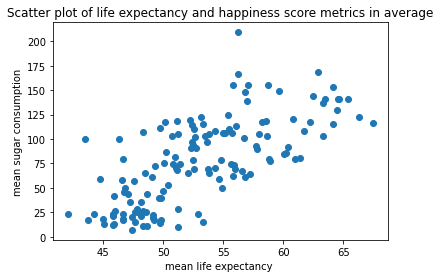

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(life_exp_mean[id_com], sug_mean[id_com])
plt.xlabel('mean life expectancy ')
plt.ylabel('mean sugar consumption')
plt.title('Scatter plot of life expectancy and happiness score metrics in average')
plt.show()

> Surprisingly, there is a positive correlation as well between the sugar consumption and life epectancy mean values. It is scientifically known that the consumption of sugar in high rates can cause a lot of diseases and consequently can shorten life expectancy. However, in this anlysis, we found a positive relationship. This can be explained by the fact that regions that are growing the most in life expectancy are the ones the most developed in the world and usually these countries process a lot of sweet food unlike poor countries that usually stick to survival food to live. 

<a id='conclusions'></a>
## Conclusions

> In our analysis, certain developed regions such as Scandinavian countries, Japan and Iceland are the most ones growing in life expectancy metric. This is highly correlated with the happiness score where the same regions are among the top 10 in average. On the other hand, there is one limitation in our analysis where we also found a positive correlation between life expectancy and sugar consumption. It is scientifically known that cosuming too much sugar can lead to many diseases and hence shorten life expectancy. These findings can be explained by the life style in the those developed countries where a lot of factories and supermarkets are present that process sweet food. Therefore, it is wise to compute more thorough analysis and stufy more factors that contributed to increase life expectancy. For instance, health care, life style/ sports can be thought of in a futher step. 

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 529, in convert_notebooks

1